# Homework 4b: Didn't Catch Them All
Physics 177, Spring 2018  
**Due:** Tuesday, May 1

*Jeremy Quijano*

## Background

This problem is based on Exercise 8.2 in Newman's *Computational Physics*. The **Lotka-Volterra** equations are a model of the population dynamics of predators and prey. See: https://en.wikipedia.org/wiki/Lotka–Volterra_equations

Let $x$ be the population of [Caterpie](http://www.pokemon.com/us/pokedex/caterpie) (prey).  
Let $y$ be the population of [Pidgeotto](http://www.pokemon.com/us/pokedex/pidgeotto) (predator).

In this system, the two main factors that govern the caterpie population is their reproduction rate and the rate at which they are [eaten by pidgeottos](https://bulbapedia.bulbagarden.net/wiki/Pokémon_food). Analogously, the pidgeotto population is governed by the availability of food and the desire to move elsewhere if there is too much competition for food. 

The Lotka-Volterra equations are:  

$\displaystyle \frac{dx}{dt} = a x - b x y$  

$\displaystyle \frac{dy}{dt} = c x y - d y$  
 
The dimensionless parameters $a$, $b$, $c$, and $d$ are positive real numbers that characterize the interaction of the two species.

## 1. Understanding the problem

In a markdown cell below, explain what the meaning of parameters $a$, $b$, $c$, and $d$. Then explain what happens in the limiting case $b= c = 0$.

**Fill in the following** (the first one is a freebie):
* $a$ is the rate at which caterpie reproduce. This is because the rate of change of the caterpie population ($\dot{x}$) has a term $ax$; this term makes the population increase at a rate proportional to the population itself. 
* $b$ is the rate at which the caterpie are preyed upon. It deals with interaction between the two species.
* $c$ is the rate at which the pideotto population grows. Similar to $b$, but since reproduction doesn't equal preyed upon, another variable is necessary.*
* $d$ is the rate at which the pidgeotto die.*
* referenced wikipedia
* The special case $b = c = 0$ is analyticall solvable. In that case the populations don't affect each other. **FILL THIS IN:** *Since they don't affect each other, they will both continue to grow at a constant rate.*


## 2. Code it up!

Let's build the code to understand this system. We have two first order differential equations:

$$\displaystyle \frac{dx}{dt} = f(x,y,t)$$

$$\displaystyle \frac{dy}{dt} = g(x,y,t)$$

Let these be functions of global variables, `a`, `b`, `c`, and `d`. Fill in the sub-problems below.

### 2.a. Parameters, functions

Fill this in the set up the problem:

In [2]:
# a quick way to fix these parameters in one line
a,b, c, d = .6, 1.3, 1.0, 1.0

def f(x,y,t):
    '''
    This is the rate of change of Caterpie as a function 
    of the current number of Caterpie (x), the current number
    of Pigeotto (y), and the current time (t).
    '''
    return a*x - b*x*y

def g(x,y,t):
    '''
    This is the rate of change of Pigeotto as a function 
    of the current number of Caterpie (x), the current number
    of Pigeotto (y), and the current time (t).
    '''
    return c*x*y - d*y

In [3]:
# Test your code: you should get 0.047 and -0.09:
print( f(.1,.1,0) )
print( g(.1,.1,0) )

0.047
-0.09


### 2.b. Time evolution 

At $t=0$, use the **initial conditions** $x_0=y_0=2$. We would like to know what happens to the populations after some amount of. We won't be picky about units, so let's assume that $t$ implicitly has some agreed upon units of time. (Thus $a$, $b$, $c$, and $d$ all have units of rate.)

1. Initialize a Python array with 100 elements. I suggest using `np.arange`. 

2. Use **Euler's method** ("simplest, most obvious ODE algorithm") to fill Python arrays `xlist` and `ylist`. Use $\Delta t = 0.05$.

3. Plot the populations as a function of time using `matplotlib`. 

You've used all of these tools before, feel free to refer back to your earlier homework, the textbook (Chapter 8), and especially the course [Gitter](https://gitter.im/Physics177-2018/).

[2, 1.8, 1.61064, 1.4345520686231041, 1.2733727007813191, 1.1278249411473074, 0.9978732829283252, 0.8829104870626762, 0.781942879141444, 0.6937524027278427, 0.6170251740938366, 0.5504449737747776, 0.4927553888164082, 0.4427966949875197, 0.3995239668847333, 0.3620122092333364, 0.32945316387554713, 0.30114725889708865, 0.27649312566975087, 0.25497628498818536, 0.23615799376215496, 0.21966481670925134, 0.2051792024499765, 0.19243116213245992, 0.18119103980207857, 0.17126330329261547, 0.16248125521708146, 0.15470255373784048, 0.14780543420018852, 0.14168553023155575, 0.13625320328196006, 0.13143130084333868, 0.1271532746098449, 0.1233616000352135, 0.1200064478419971, 0.11704456597020906, 0.11443833725784511, 0.1121549839166757, 0.11016589472078293, 0.10844605488441265, 0.10697356198607569, 0.10572921410305659, 0.10469615864754152, 0.10385959232261985, 0.10320650421155834, 0.10272545533426593, 0.10240638909856166, 0.10224046798040522, 0.10221993251945549, 0.10233797934124371, 0.102588655437

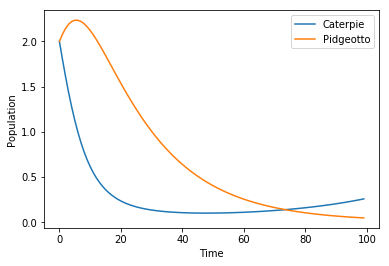

In [15]:
import numpy as np

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2 # Caterpie population
y0 = 2 # Pidgeotto population
dt = 0.05 # time step
N  = 100 # number of steps

## A an array: [0,1,2, ..., N]
time = np.arange(N)


xlist = []
ylist = []

# Initialize x and y
x = x0
y = y0

for t in time:
    xlist.append(x)
    x += f(x,y,t)*dt
    ylist.append(y)
    y+= g(x,y,t)*dt

print(xlist)
    
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time, xlist, label = 'Caterpie')
plt.plot(time, ylist, label = 'Pidgeotto')

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

### 2.c. Discussion

Your plot should reproduce this:

<img src="HW4b_2b.png">

In your own words, tell the story of what is going on with the Caterpie and Pidgeotto populations over the time period shown. What do you expect will happen as these populations continue to dynamically evolve?

*The Pidgeotto population increases at first because there is enough Caterpie to sustain their growth, and the Caterpie population decreases because they are getting eaten. At somepoint, there aren't enough Caterpie to sustain the Pidgeotto population and they start to decrease. Both populations continue to decrease until the Caterpie reproduction is greater than the rate at which they are being eaten. After this, the Caterpie population will increase and the Pidgeotto population will decrease until there are enough Caterpie to maintain their population. This cycle will repeat.*

### 2.d. Evolution into the future

Copy your code from Problem 2.b and paste it into the empty cell below. Re-run the code for $N=500$

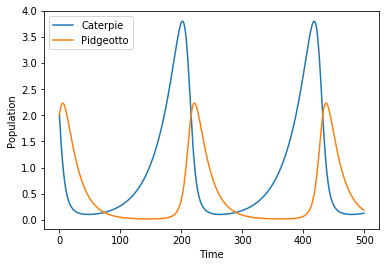

In [5]:
import numpy as np

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2 # Caterpie population
y0 = 2 # Pidgeotto population
dt = 0.05 # time step
N  = 500 # number of steps

## A an array: [0,1,2, ..., N]
time = np.arange(N)


xlist = []
ylist = []

# Initialize x and y
x = x0
y = y0

for t in time:
    xlist.append(x)
    x += f(x,y,t)*dt
    ylist.append(y)
    y+= g(x,y,t)*dt


%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time, xlist, label = 'Caterpie')
plt.plot(time, ylist, label = 'Pidgeotto')

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

### 2.e. Other initial conditions

Copy your code from Problem 2.b and paste it into the empty cell below. Re-run the code with a different set of Lotka-Volterra parameters:

```python
a, b, c, d = 4, 2, 3, 3
```

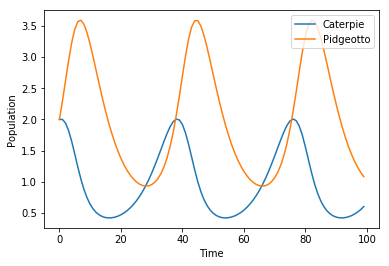

In [14]:
import numpy as np

a, b, c, d = 4, 2, 3, 3

x0 = 2 # Caterpie population
y0 = 2 # Pidgeotto population
dt = 0.05 # time step
N  = 100 # number of steps

## A an array: [0,1,2, ..., N]
time = np.arange(N)


xlist = []
ylist = []

# Initialize x and y
x = x0
y = y0

for t in time:
    xlist.append(x)
    x += f(x,y,t)*dt
    ylist.append(y)
    y+= g(x,y,t)*dt


%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time, xlist, label = 'Caterpie')
plt.plot(time, ylist, label = 'Pidgeotto')

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

### 2.f. [Things Fall Apart](https://en.wikipedia.org/wiki/Things_Fall_Apart)

Let's see what happens if we choose our integration poorly. 

Once again, copy your code from Problem 2.b and paste it into the empty cell below. You should be back to the original set of  Lotka-Volterra parameters:

```python
a, b, c, d = .6, 1.3, 1, 1
```

But this time, let's try to be cheap and use a much bigger time step. Try using `dt = 0.5` and `N = 10`. This should look nothing like the behavior  you expect from the nice plots you produced earlier. You did get nice plots earlier, right?  

Say a few words about what went wrong.

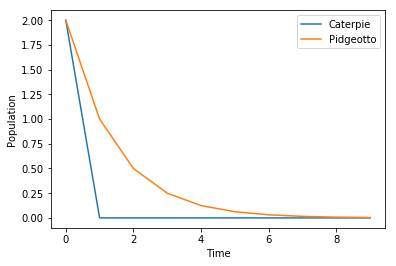

In [21]:
import numpy as np

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2 # Caterpie population
y0 = 2 # Pidgeotto population
dt = 0.5 # time step
N  = 10 # number of steps

## A an array: [0,1,2, ..., N]
time = np.arange(N)


xlist = []
ylist = []

# Initialize x and y
x = x0
y = y0

for t in time:
    xlist.append(x)
    x += f(x,y,t)*dt
    ylist.append(y)
    y+= g(x,y,t)*dt


%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time, xlist, label = 'Caterpie')
plt.plot(time, ylist, label = 'Pidgeotto')

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

**Explain what went wrong**: *Since the time step is larger and the number of steps is less, the b term will overpower the function and it will reach zero very quickly. This kills the caterpie population quickly and causes the pidgeotto population to slowly die since they aren't interacting anymore.*

## 3. Population Dynamics Phase Space

By now you've noticed the periodic behavior of the system. You may have realized that the plots that we're making are useful if we really care about what time of year to visit [Kanto](https://bulbapedia.bulbagarden.net/wiki/Region) in order to see caterpies or pigeottos, but are not actually as useful for understanding how the two populations are inter-related. Let's make those plots. 

### 3.a. The caterpie---pigetotto plane

Copy the code from Problem 2.d (with `N=500`) and modify it so that it plots the caterpie and pidgeotto populations on the horizontal and vertical axes, respectively. 

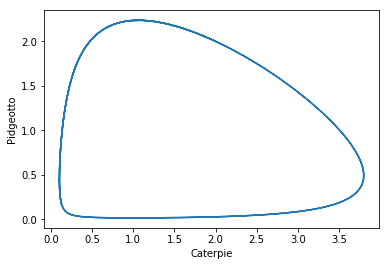

In [34]:
import numpy as np

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2 # Caterpie population
y0 = 2 # Pidgeotto population
dt = 0.05 # time step
N  = 500 # number of steps

## A an array: [0,1,2, ..., N]
time = np.arange(N)


xlist = []
ylist = []

# Initialize x and y
x = x0
y = y0

for t in time:
    xlist.append(x)
    x += f(x,y,t)*dt
    ylist.append(y)
    y+= g(x,y,t)*dt


%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(xlist, ylist)

plt.xlabel('Caterpie')
plt.ylabel('Pidgeotto')
#plt.legend()
plt.show()

### 3.b. The velocity in population space

**Quiver plots** are what `matplotlib` calls plots of vector fields. Here's an example of how they work:

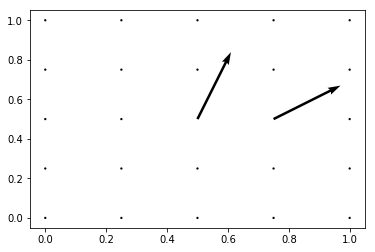

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# base positions of the vectors
x = np.linspace(0,1,5)
y = np.linspace(0,1,5)

# magnitude of the x- and y-components of each vector
u = np.zeros((5,5)) # initialize to zero everywhere
v = np.zeros((5,5)) # initialize to zero everywhere

u[2,2] = .1 # x-component of vector at (2,2)
v[2,2] = .2 # y-component of vector at (2,2)

u[2,3] = .2 # x-component of vector at (2,2)
v[2,3] = .1 # y-component of vector at (2,2)



plt.quiver(x, y, u, v, scale=1)
plt.show()

Make a vector field that show the vector 

$$ \mathbf{v}(x,y) = \left (\dot x, \dot y \right)$$

at each position on the caterpie-pigeotto plane. You'll have to vectorize the functions $f$ and $g$. I'll get you started.

Overlay the vector field plot on the plot from Problem 3.a.

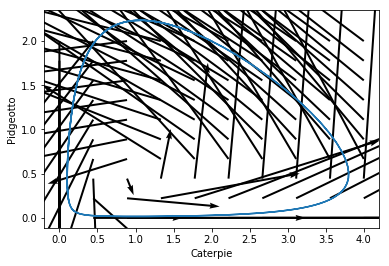

In [38]:
ff = np.vectorize(f)
gg = np.vectorize(g)

side = np.linspace(0,4,10)
XX,YY = np.meshgrid(side,side/2)
UU = ff(XX,YY,0)
VV = gg(XX,YY,0)

plt.quiver(XX,YY,UU,VV,scale=1)
plt.plot(xlist, ylist)
plt.xlabel('Caterpie')
plt.ylabel('Pidgeotto')
plt.show()

This image now shows the cyclicity of the caterpie and pigeotto populations as well as how long the populations spend in any particular part of the cycle.

### 3.c. Describe the dynamics

In the markdown cell below, write a few sentences describing the cycle of caterpie and pigeotto populations. You may want to describe this in terms of three "phases" corresponding to the three notable features of the plot in Problem 3.b.

**Phase 1: Caterpie population increase (Bottom part of graph)**

*The Caterpie population increases, the Pigeotto population will start to increase.*

**Phase 2: Caterpie population decrease (Top part of graph)**

*As the Pigeotto population increases, they eat Caterpie faster than they reproduce causing them to decrease.*

**Phase 3: Pigeotto population decrease(Left part of graph)**

*As Caterpie decrease, there isn't enough to sustain the large Pigeotto population. This causes their population to decrease.*

## X. Extra Credit

Modify $f(x,y,t)$ and $g(x,y,t)$ to include external effects. For example, consider putting in a time-dependent factor (something like $\sin(t)$) that is supposed to model the seasons. Maybe certain times of the year it is difficult for pidgotto to hunt caterpie, for example. Redo the main plots in problem 2 adn 3.

## Y. Extra Credit

Redo Problem 2.c using the second-order **Runge-Kutta** algorithm (see example 8.2 in the textbook). How much smaller can you make $N$ to still get a plot that is reasonably close to the one you found in Problem 2.c with Euler's method and $\Delta t = 0.05$, $N = 100$. Remember that $N\Delta t$ is constant, so you have to also increase $\Delta t$ to make sure you're integrating the ODE over the same range.